In [52]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do"
#df = pandas를 이용해서 table로 작성된 url에 접근하여 data를 가져온다. 

df = pd.read_html(url)

In [53]:
type(df)
df[-2]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2360,16047,8.18.,기타,-,확인 중,배정중
1,2359,16053,8.18.,기타,-,확인 중,배정중
2,2358,15958,8.18.,기타,-,확인 중,배정중
3,2357,16023,8.18.,기타,-,확인 중,배정중
4,2356,15955,8.18.,기타,-,확인 중,배정중
...,...,...,...,...,...,...,...
2355,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
2356,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
2357,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
2358,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [152]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/malgun.TTF").get_name()
rc('font', family=font_name, size=12)  #rc는 리소스관리 
plt.rcParams['axes.unicode_minus'] = False

#retina display가 지원되는 환경에서 시각화의 폰트가 더 선명해보인다. 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
#가져온 dataframe을 살펴본다. 

In [55]:
#몇번째에 있는 table이 분석하고자 하는 data인지 알아본다. 
df[-2]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2360,16047,8.18.,기타,-,확인 중,배정중
1,2359,16053,8.18.,기타,-,확인 중,배정중
2,2358,15958,8.18.,기타,-,확인 중,배정중
3,2357,16023,8.18.,기타,-,확인 중,배정중
4,2356,15955,8.18.,기타,-,확인 중,배정중
...,...,...,...,...,...,...,...
2355,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
2356,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
2357,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
2358,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [56]:
#분석하고자 하는 table이 발견되어있다면 이를 파일로 저장해두자~ index=False
df[-2].to_csv("covid19.csv", index=False)

In [57]:
#저장된 파일을 읽어온다. index_col="연번"
#연번 = 서울시 내
#환자 = 우리나라 전체
df_covid = pd.read_csv("covid19.csv", index_col="연번")
df_covid.head(5)

,환자,확진일,거주지,여행력,접촉력,조치사항
연번,,,,,,
2360,16047,8.18.,기타,-,확인 중,배정중
2359,16053,8.18.,기타,-,확인 중,배정중
2358,15958,8.18.,기타,-,확인 중,배정중
2357,16023,8.18.,기타,-,확인 중,배정중
2356,15955,8.18.,기타,-,확인 중,배정중


In [58]:
df_covid.shape

(2360, 6)

In [59]:
#연번 값으로 sort : sort_index(), sort_values()  ascending=False
# df_covid.sort_index(ascending=False)
df_covid["환자"].sort_values(ascending=False)
df_covid.sort_values(by="확진일")

# df_covid.iloc[2307, :]
# iloc : 데이터의 순서
df_covid.iloc[[1,2,3], :]
#loc : index 이름
df_covid.loc[[1,2,3], :]

,환자,확진일,거주지,여행력,접촉력,조치사항
연번,,,,,,
1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)
2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)


In [61]:
df_covid

,환자,확진일,거주지,여행력,접촉력,조치사항
연번,,,,,,
2360,16047,8.18.,기타,-,확인 중,배정중
2359,16053,8.18.,기타,-,확인 중,배정중
2358,15958,8.18.,기타,-,확인 중,배정중
2357,16023,8.18.,기타,-,확인 중,배정중
2356,15955,8.18.,기타,-,확인 중,배정중
...,...,...,...,...,...,...
5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)


In [60]:
#확진이 가장많은 일자는 언제일까?  value_counts()
df_covid["확진일"].value_counts()

8.18.    151
8.15.    146
8.17.    132
8.16.     90
8.14.     73
        ... 
2.2.       1
1.24.      1
5.01.      1
2.7.       1
3.3.       1
Name: 확진일, Length: 180, dtype: int64

In [62]:
#칼럼들은 어떤 data type일까? 확진일은?
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 2360 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   환자      2360 non-null   object
 1   확진일     2360 non-null   object
 2   거주지     2360 non-null   object
 3   여행력     2360 non-null   object
 4   접촉력     2360 non-null   object
 5   조치사항    2359 non-null   object
dtypes: object(6)
memory usage: 209.1+ KB


In [63]:
df_covid.확진일.dtype

dtype('O')

In [64]:
df_covid["확진일"].head(3)

연번
2360    8.18.
2359    8.18.
2358    8.18.
Name: 확진일, dtype: object

In [65]:
pd.to_datetime('2020-' + df_covid["확진일"].str.replace(".","-"))

연번
2360   2020-08-18
2359   2020-08-18
2358   2020-08-18
2357   2020-08-18
2356   2020-08-18
          ...    
5      2020-01-31
4      2020-01-30
3      2020-01-30
2      2020-01-30
1      2020-01-24
Name: 확진일, Length: 2360, dtype: datetime64[ns]

In [66]:
#확진일을 날짜로 변경해보자. pd.to_datetime() ...2020- + .을 -로 변경해본다 
df_covid["확진일"] = pd.to_datetime('2020-' + df_covid["확진일"].str.replace(".","-"))
df_covid["확진일"]

연번
2360   2020-08-18
2359   2020-08-18
2358   2020-08-18
2357   2020-08-18
2356   2020-08-18
          ...    
5      2020-01-31
4      2020-01-30
3      2020-01-30
2      2020-01-30
1      2020-01-24
Name: 확진일, Length: 2360, dtype: datetime64[ns]

In [67]:
df_covid.head(3)

,환자,확진일,거주지,여행력,접촉력,조치사항
연번,,,,,,
2360,16047,2020-08-18,기타,-,확인 중,배정중
2359,16053,2020-08-18,기타,-,확인 중,배정중
2358,15958,2020-08-18,기타,-,확인 중,배정중


In [69]:
#series에 month, week
df_covid["월"] = df_covid["확진일"].dt.month
df_covid["주"] = df_covid["확진일"].dt.week
df_covid.head(3)

,환자,확진일,거주지,여행력,접촉력,조치사항,월,주
연번,,,,,,,,
2360,16047,2020-08-18,기타,-,확인 중,배정중,8,34
2359,16053,2020-08-18,기타,-,확인 중,배정중,8,34
2358,15958,2020-08-18,기타,-,확인 중,배정중,8,34


In [70]:
#확진일, 월, 주 칼럼을 확인한다. 
df_covid[["확진일","월","주"]]

,확진일,월,주
연번,,,
2360,2020-08-18,8,34
2359,2020-08-18,8,34
2358,2020-08-18,8,34
2357,2020-08-18,8,34
2356,2020-08-18,8,34
...,...,...,...
5,2020-01-31,1,5
4,2020-01-30,1,5
3,2020-01-30,1,5


In [78]:
# 확진일에 대해 index sort , value sort:ascending=False   확진자수display 
# df_covid.sort_index()
# df_covid.sort_values(by="확진일", ascending=False)

s = df_covid.확진일.value_counts().sort_values(ascending=False)

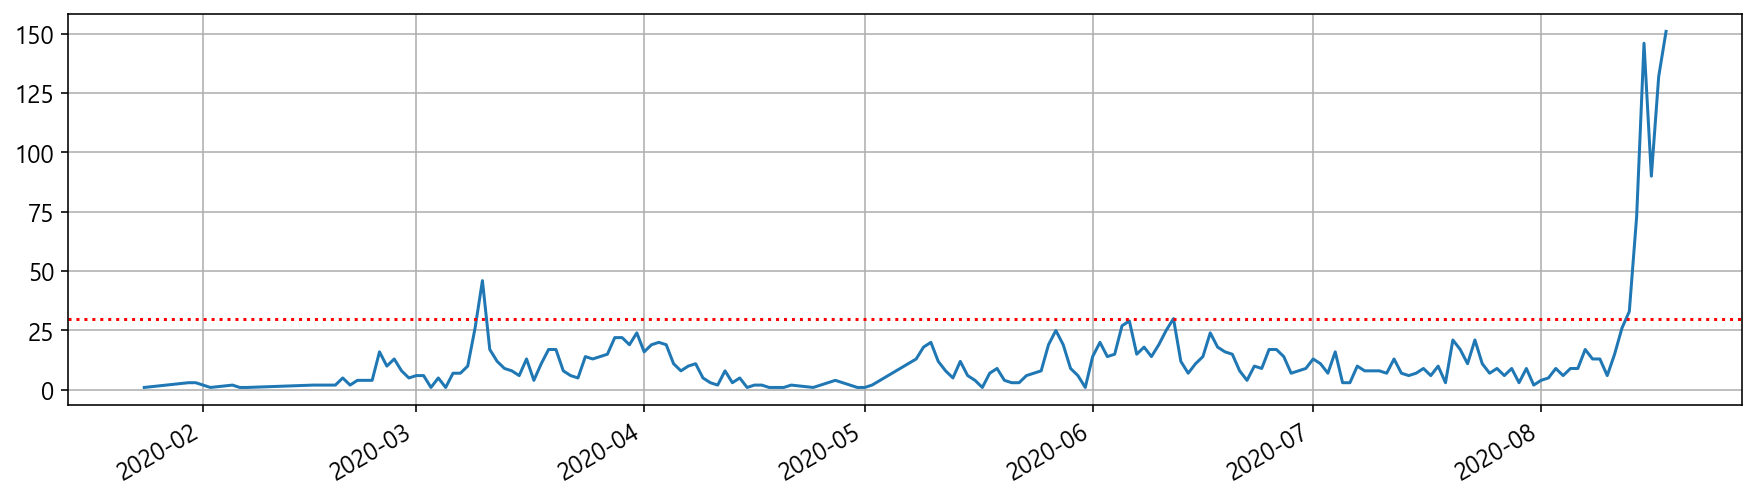

In [79]:
#확진일자로 선 그래프그리기 
s.plot(figsize=(15,4), rot=30, grid=True)
#지정 위치에 수직/수평선을 그리려면?axhline(), axvline() 함수를 사용
plt.axhline(30, linestyle=":", color="red")
plt.show()

In [84]:
#2020년 3089년으로 그려진다. 이유는 모름....그래서 문자로 변경함 
aa = df_covid["확진일"].astype(str).map(lambda x: x[-5:])
aa.value_counts()

08-18    151
08-15    146
08-17    132
08-16     90
08-14     73
        ... 
04-24      1
04-15      1
04-19      1
02-06      1
03-05      1
Name: 확진일, Length: 179, dtype: int64

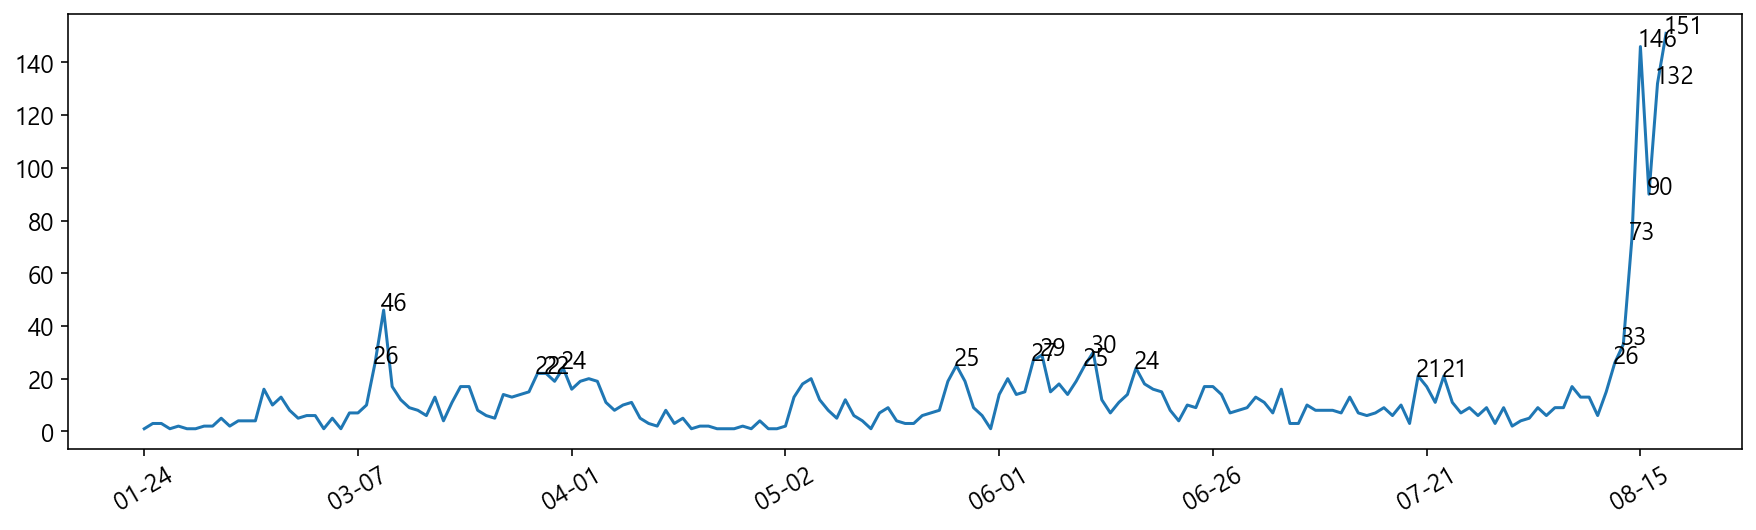

In [82]:
#선그래프 확진자수를 선그래프에 그리기
df_covid["월일"] = df_covid["확진일"].astype(str).map(lambda x : x[-5:])
day_count = df_covid["월일"].value_counts().sort_index()
g = day_count.plot(figsize=(15,4), rot=30)
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count>20:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

In [85]:
#확진자가 가장 많이 나온날
day_count.describe()

count    179.000000
mean      13.184358
std       20.054829
min        1.000000
25%        5.000000
50%        9.000000
75%       15.000000
max      151.000000
Name: 월일, dtype: float64

In [86]:
day_count[day_count == day_count.max()]

08-18    151
Name: 월일, dtype: int64

In [87]:
df_covid[df_covid["월일"] == "08-15"]

,환자,확진일,거주지,여행력,접촉력,조치사항,월,주,월일
연번,,,,,,,,,
1987,15298,2020-08-15,강북구,-,확인 중,병상 배정 중,8,33,08-15
1986,15250,2020-08-15,노원구,-,성북구 사랑제일교회 관련,병상 배정 중,8,33,08-15
1985,15244,2020-08-15,노원구,-,성북구 사랑제일교회 관련,병상 배정 중,8,33,08-15
1984,15230,2020-08-15,기타,중국,해외 접촉 추정,병상 배정 중,8,33,08-15
1983,15223,2020-08-15,강북구,-,성북구 사랑제일교회 관련,병상 배정 중,8,33,08-15
...,...,...,...,...,...,...,...,...,...
1846,15225,2020-08-15,중랑구,-,용인시 우리제일교회 관련,서울대학교병원,8,33,08-15
1845,15249,2020-08-15,중랑구,-,성북구 사랑제일교회 관련,서울의료원,8,33,08-15
1844,15100,2020-08-15,서대문구,-,성북구 사랑제일교회 관련,보라매병원,8,33,08-15


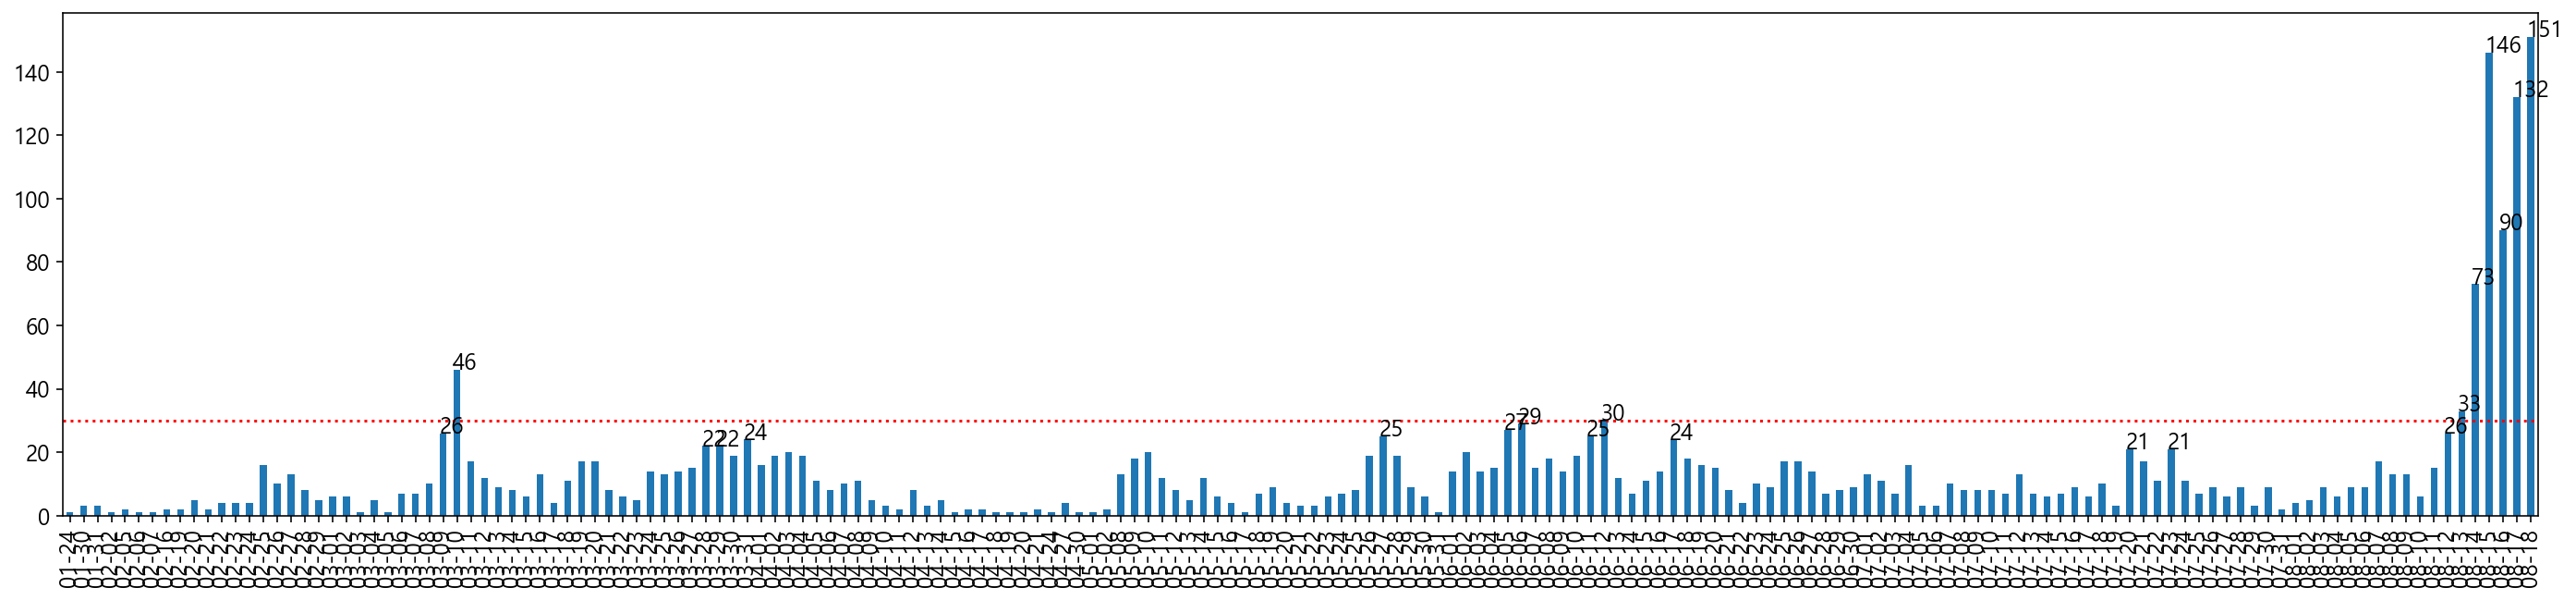

In [89]:
#막대그래프그리기
g=day_count.plot.bar(figsize=(24,5))
g.axhline(30, linestyle=":", color="red")
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count>20:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

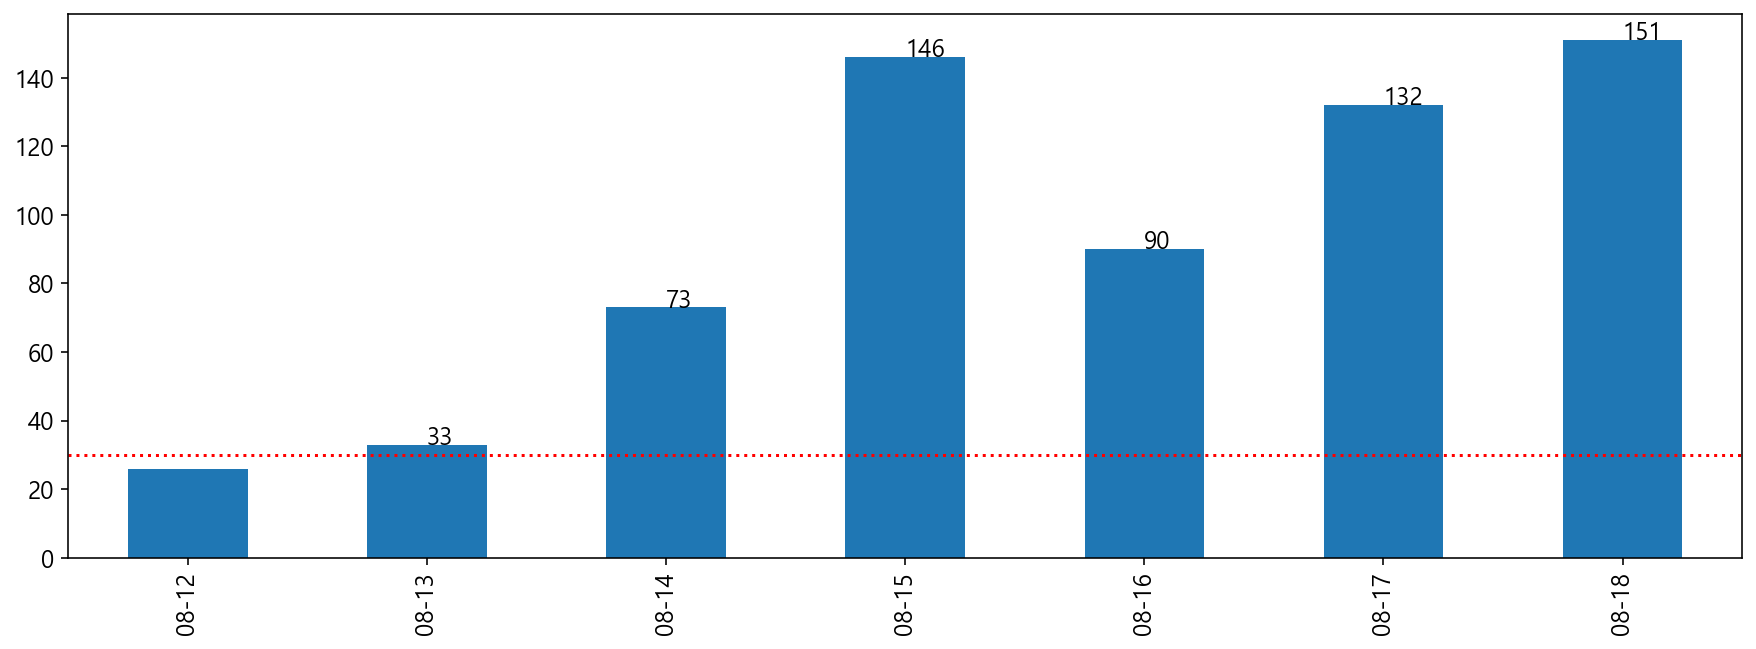

In [99]:
#최근데이터만 그리기 
day_count_last = day_count[-7:]
g=day_count_last.plot.bar(figsize=(15,5))
g.axhline(30, linestyle=":", color="red")
for i in range(len(day_count_last)):
    case_count = day_count_last.iloc[i]
    if case_count>30:
        g.text(x=i, y=case_count, s=case_count)

In [100]:
# 월별로 정리
df_covid["월"].value_counts().sort_index()

1      7
2     80
3    391
4    156
5    228
6    460
7    281
8    757
Name: 월, dtype: int64

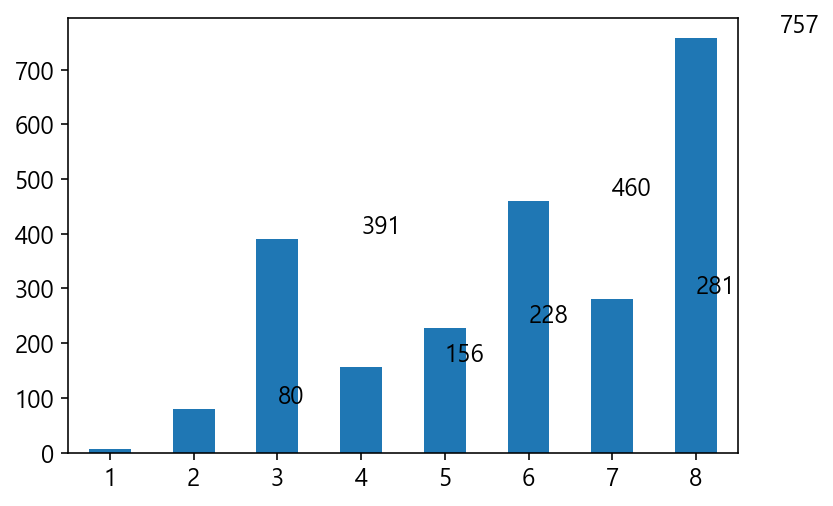

In [107]:
#월별 확진자수 그리기 
month_case = df_covid["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)
for i in range(len(month_case)):
    case_count = month_case.iloc[i]
    if case_count>30:
        g.text(x=month_case.index[i], y=case_count+10, s=case_count)

In [108]:
df_covid["주"].value_counts()

33    389
34    283
23    134
14    128
24    125
11    124
25    106
13    105
30     97
22     87
26     78
32     76
12     76
27     67
9      62
28     57
19     51
20     48
29     48
15     47
21     39
31     38
10     37
8      17
16     15
18      8
5       7
17      4
6       4
7       2
4       1
Name: 주, dtype: int64

In [106]:
#주단위 확진자수 
weekly_case = df_covid["주"].value_counts().sort_index()
weekly_case

4       1
5       7
6       4
7       2
8      17
9      62
10     37
11    124
12     76
13    105
14    128
15     47
16     15
17      4
18      8
19     51
20     48
21     39
22     87
23    134
24    125
25    106
26     78
27     67
28     57
29     48
30     97
31     38
32     76
33    389
34    283
Name: 주, dtype: int64

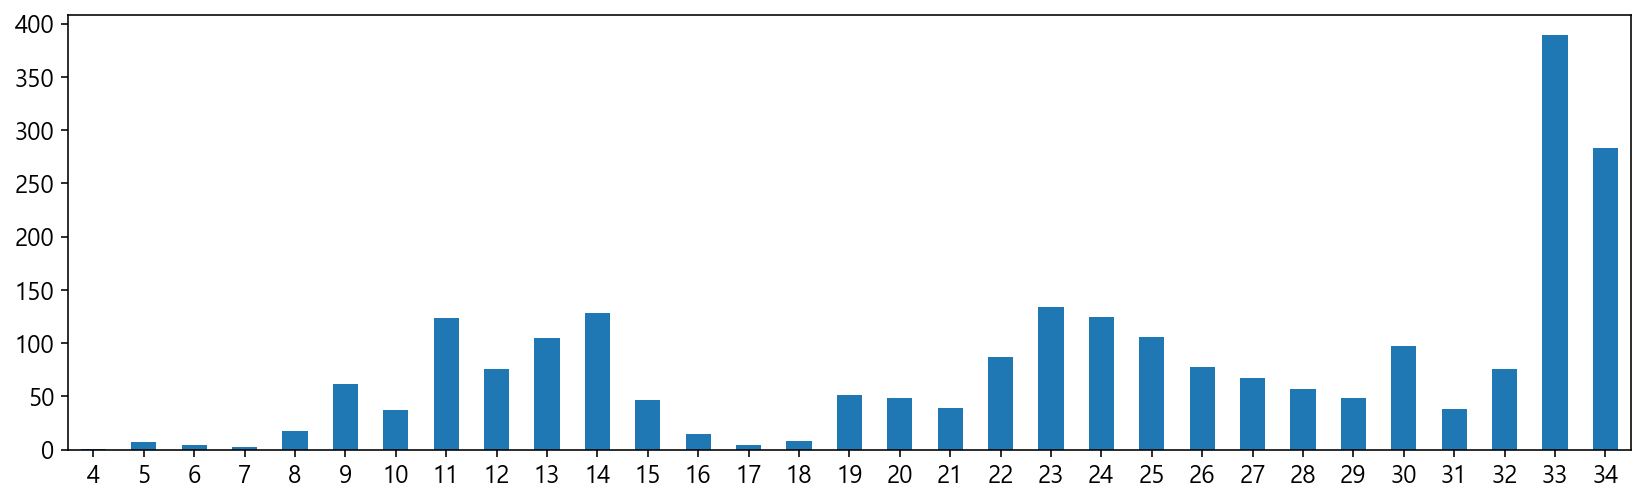

In [120]:
weekly_case.plot.bar(rot=0, figsize=(14,4))

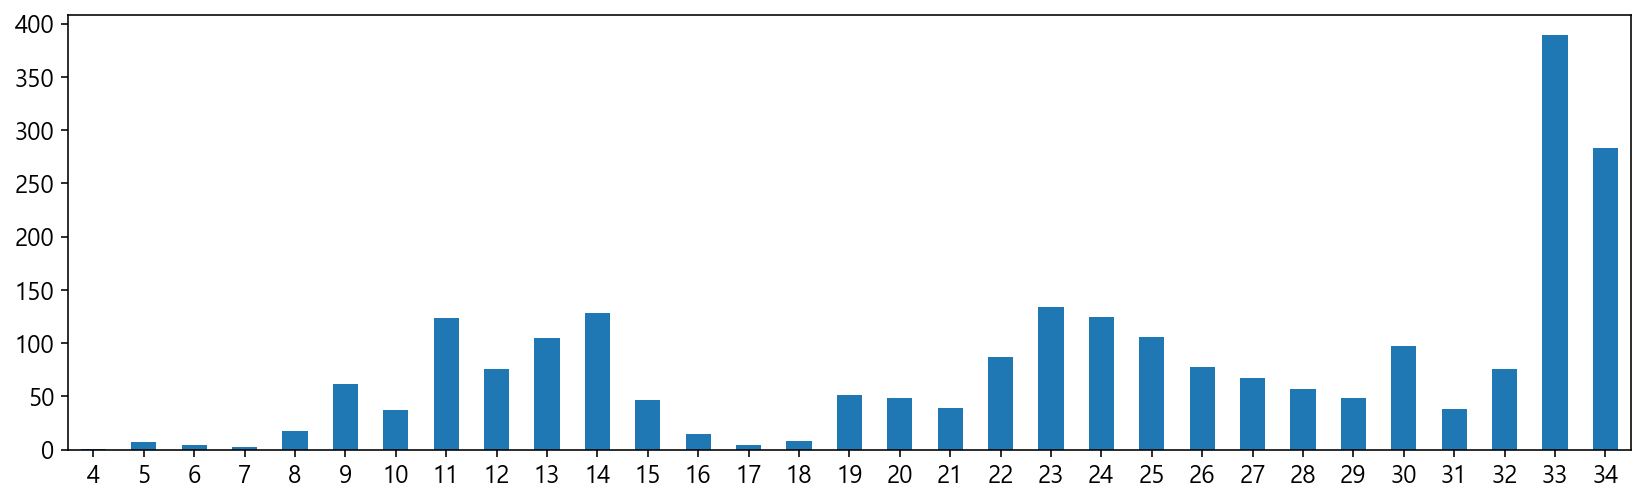

In [116]:
weekly_case.plot.bar(rot=0, figsize=(14,4))
plt.show() #그래프만 표시

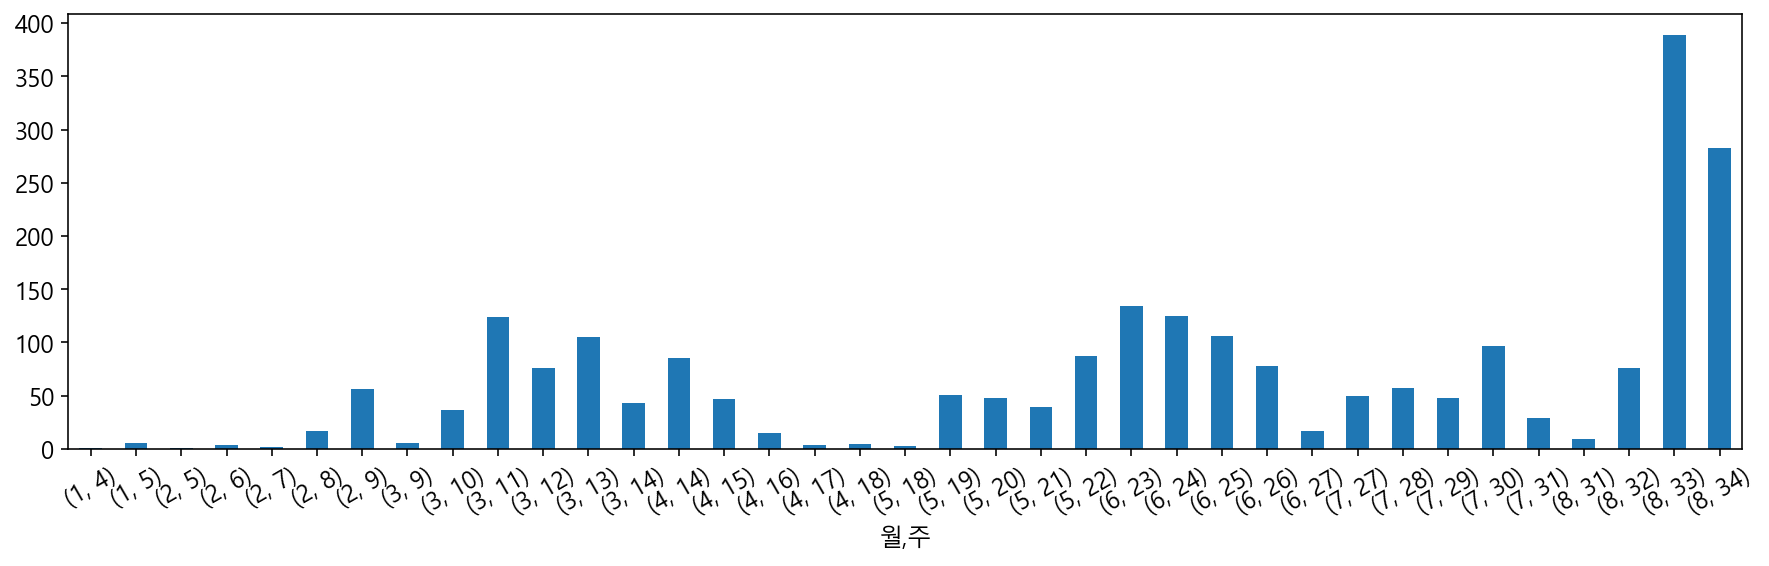

In [122]:
#월-주 함께그리기
month_weekly_case = df_covid.groupby(["월","주"])["환자"].count()
month_weekly_case.plot.bar(figsize=(15,4), rot=30)

In [128]:
df_covid.iloc[-1, 1]
df_covid.loc[2360, "확진일"]

Timestamp('2020-08-18 00:00:00')

In [121]:
#모든 날짜를 행에 만들어주기...확진자가 없는 일자도 포함 
first_day = df_covid.iloc[-1]["확진일"]
last_day = df_covid.iloc[0]["확진일"]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-08-18 00:00:00'))

In [134]:
days = pd.date_range(first_day, last_day, freq='D')
# days = pd.DataFrame({"확진일":days})
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16',
               '2020-08-17', '2020-08-18'],
              dtype='datetime64[ns]', length=208, freq='D')

In [136]:
#확진일자별로 빈도수 구하기
daily_case = df_covid["확진일"].value_counts()
daily_case = daily_case.to_frame()
daily_case.columns = ["확진자수"]
daily_case.head()

,확진자수
2020-08-18,151
2020-08-15,146
2020-08-17,132
2020-08-16,90
2020-08-14,73


In [147]:
df_covid[df_covid.확진일 == "2020-01-24"]

,환자,확진일,거주지,여행력,접촉력,조치사항,월,주,월일
연번,,,,,,,,,
1,2,2020-01-24,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),1,4,01-24


In [ ]:
#merge를 통해 전체 확진일자 구하기 
all_day = days.merge(daily_case, left_on="확진일", right_on=daily_case.index, how="left")
all_day.head()

In [153]:
all_day["누적확진"] = all_day["확진자수"].fillna(0).cumsum() # 누적
all_day[all_day["확진일"] == "2020-08-15"]

,확진일,확진자수,누적확진,일자
204,2020-08-15,146.0,1987.0,08-15


In [155]:
all_day["일자"] = all_day["확진일"].astype(str).map(lambda x : x[-5:])
all_day["일자"].head()

0    01-24
1    01-25
2    01-26
3    01-27
4    01-28
Name: 일자, dtype: object

In [156]:
cum_day = all_day.set_index("일자")
cum_day = cum_day[["확진자수","누적확진"]]
cum_day

,확진자수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
08-14,73.0,1841.0
08-15,146.0,1987.0
08-16,90.0,2077.0


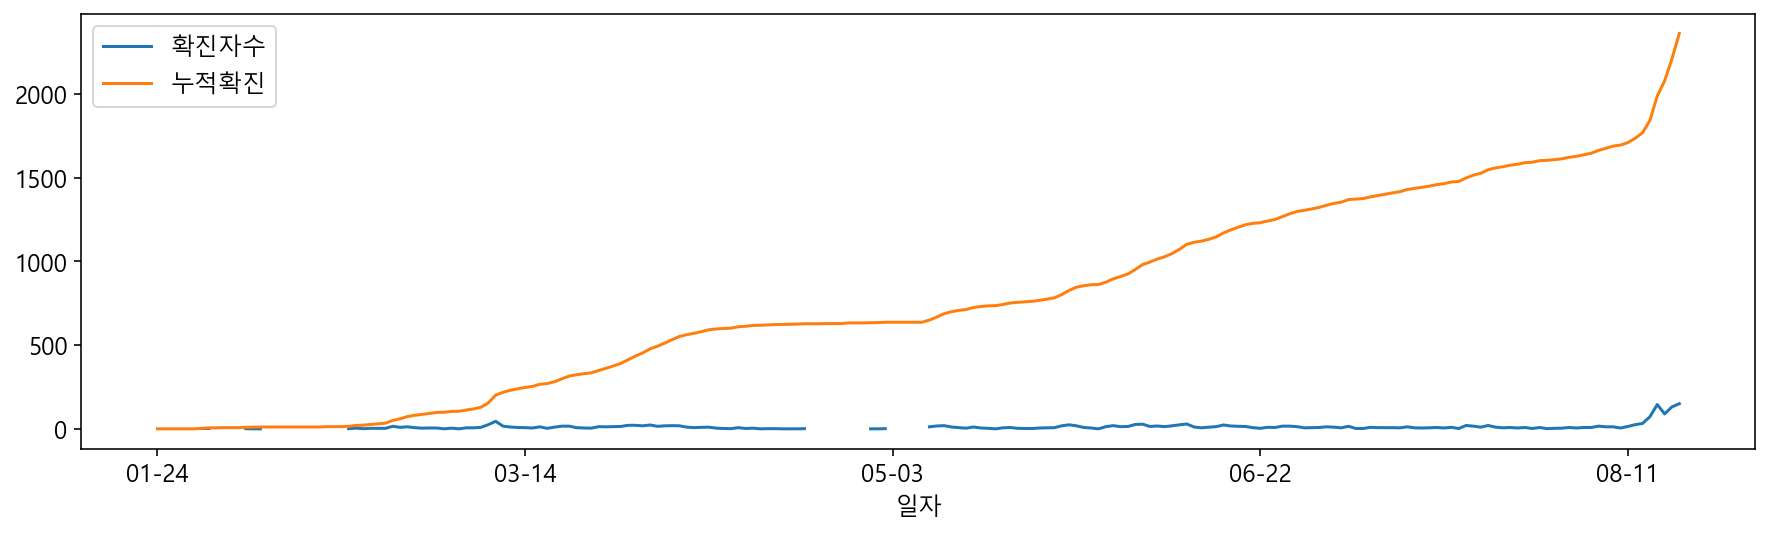

In [157]:
cum_day.plot(figsize=(15,4))
#누적확진자와 발생확진자의 숫자의 크기가 커서 확진자수를 명확히 보기가 어렵다. 

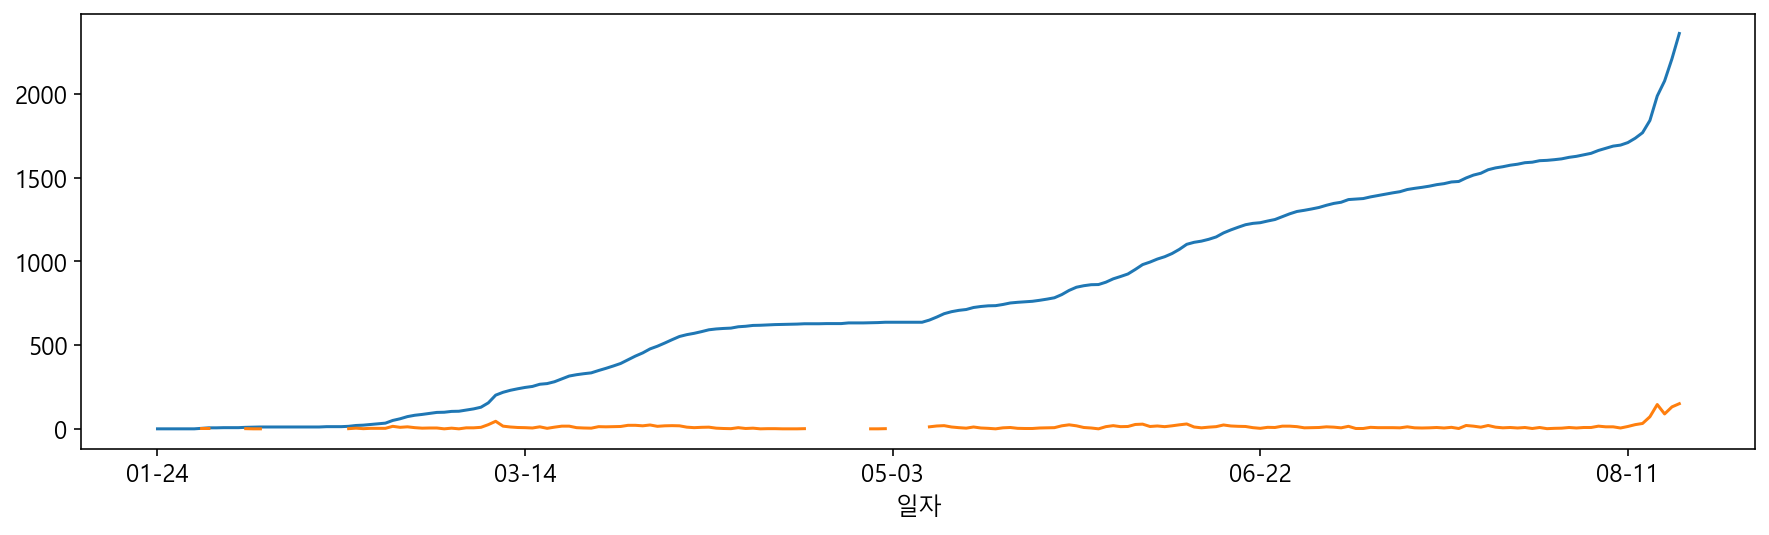

In [158]:
#시리즈로 그리기
cum_day["누적확진"].plot(label="누적확진", figsize=(15,4))
cum_day["확진자수"].plot(label="확진자수", figsize=(15,4))

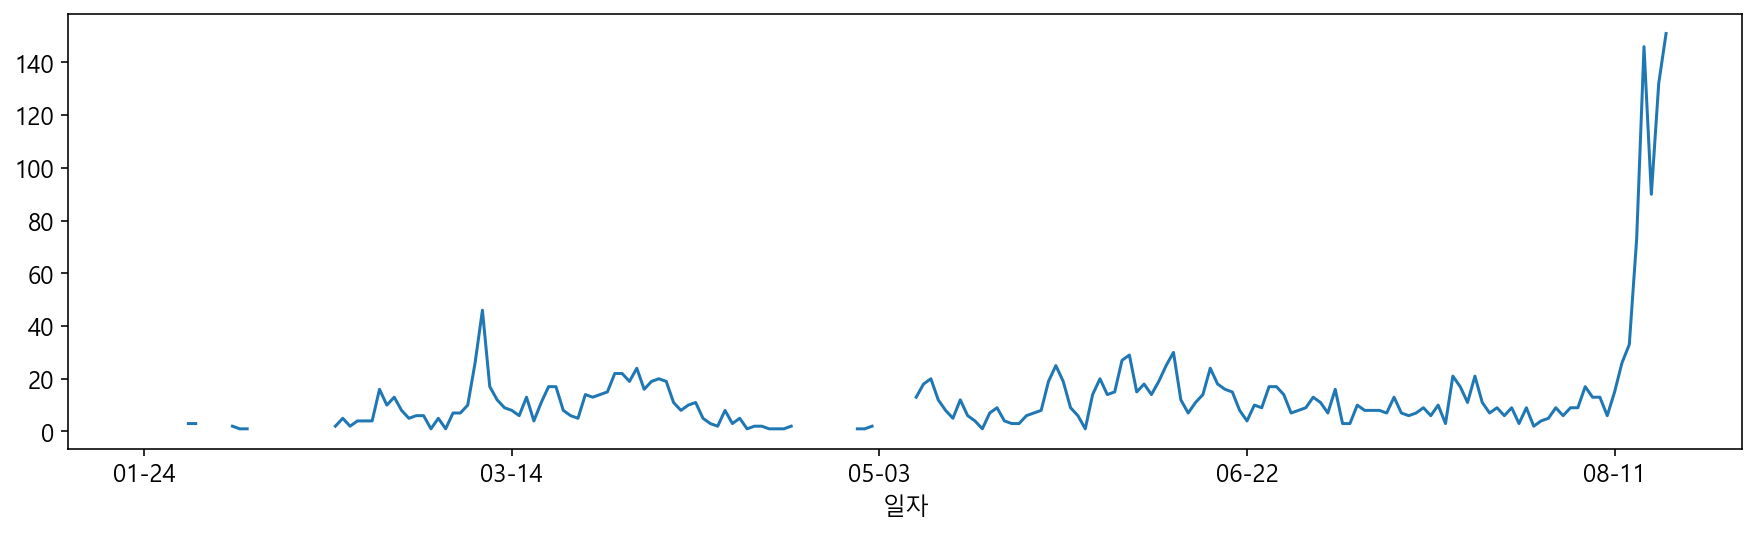

In [159]:
#확진자수만 따로 그리기
cum_day["확진자수"].plot(label="확진자수", figsize=(15,4))

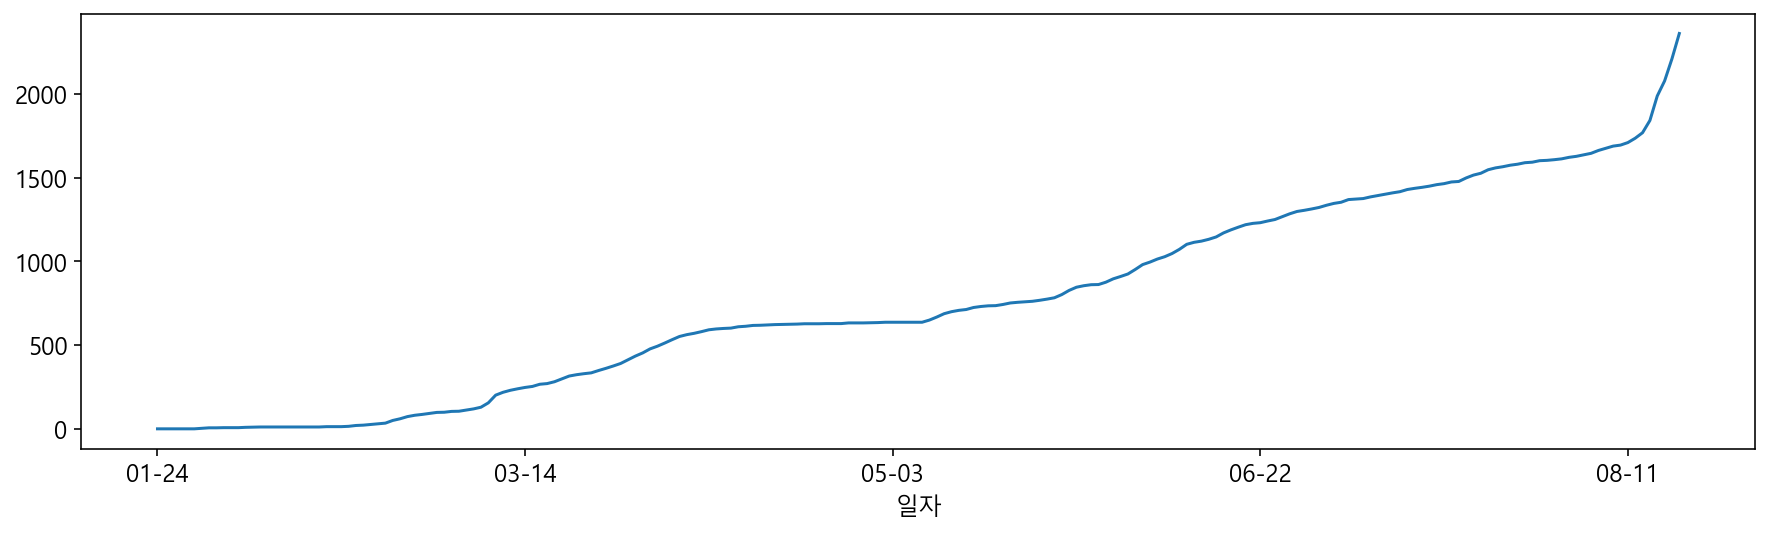

In [162]:
#누적확진자수만 따로 그리기
cum_day["누적확진"].plot(label="누적확진", figsize=(15,4))

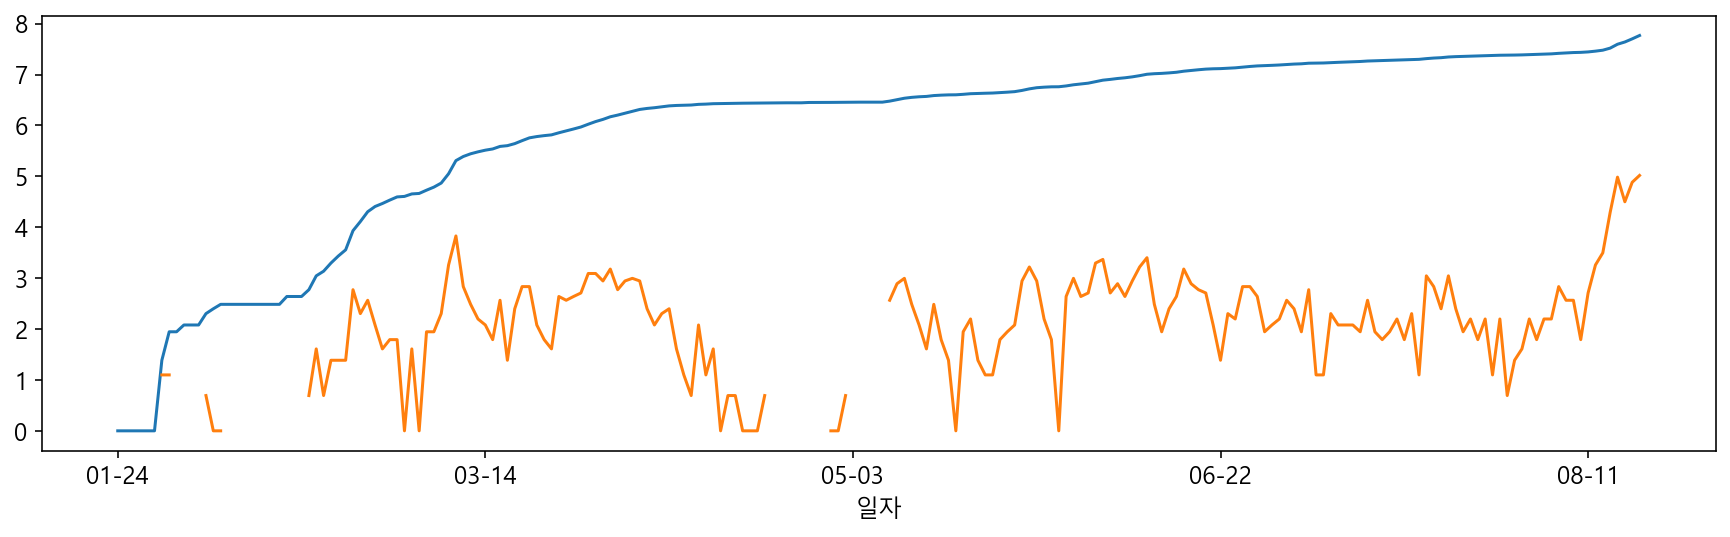

In [163]:
#로그스케일
# 차이가 너무 커서 자세히 보고자하는 경우는 로그스케일로 표현하면 큰 차이의 스케일을 조정해서 볼 수 있다. 
import numpy as np
np.log(cum_day["누적확진"]).plot(label="누적확진", figsize=(15,4))
np.log(cum_day["확진자수"]).plot(label="확진자수", figsize=(15,4))

In [164]:
#확진월과 요일 구하기
all_day["확진월"] = all_day["확진일"].dt.month
all_day["확진요일"] = all_day["확진일"].dt.dayofweek
all_day.head()

,확진일,확진자수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


In [165]:
#월별, 요일별 확진자수를 groupby로 구하기
#unstack() 요일을 옆으로 배치 
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진자수"].sum().unstack().astype(int)

all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,147,172,35,42,90,163,108


In [166]:
dayofweek = "월 화 수 목 금 토 일";
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [167]:
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,147,172,35,42,90,163,108


In [168]:
all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,147,172,35,42,90,163,108


In [169]:
cum_day = all_day.set_index("일자")
cum_day = cum_day[["확진자수", "누적확진"]]
cum_day

,확진자수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
08-14,73.0,1841.0
08-15,146.0,1987.0
08-16,90.0,2077.0


In [170]:
#거주지별 확진자수
gu_count = df_covid["거주지"].value_counts()
gu_count.head()

관악구    164
성북구    161
송파구    145
강서구    133
강남구    119
Name: 거주지, dtype: int64

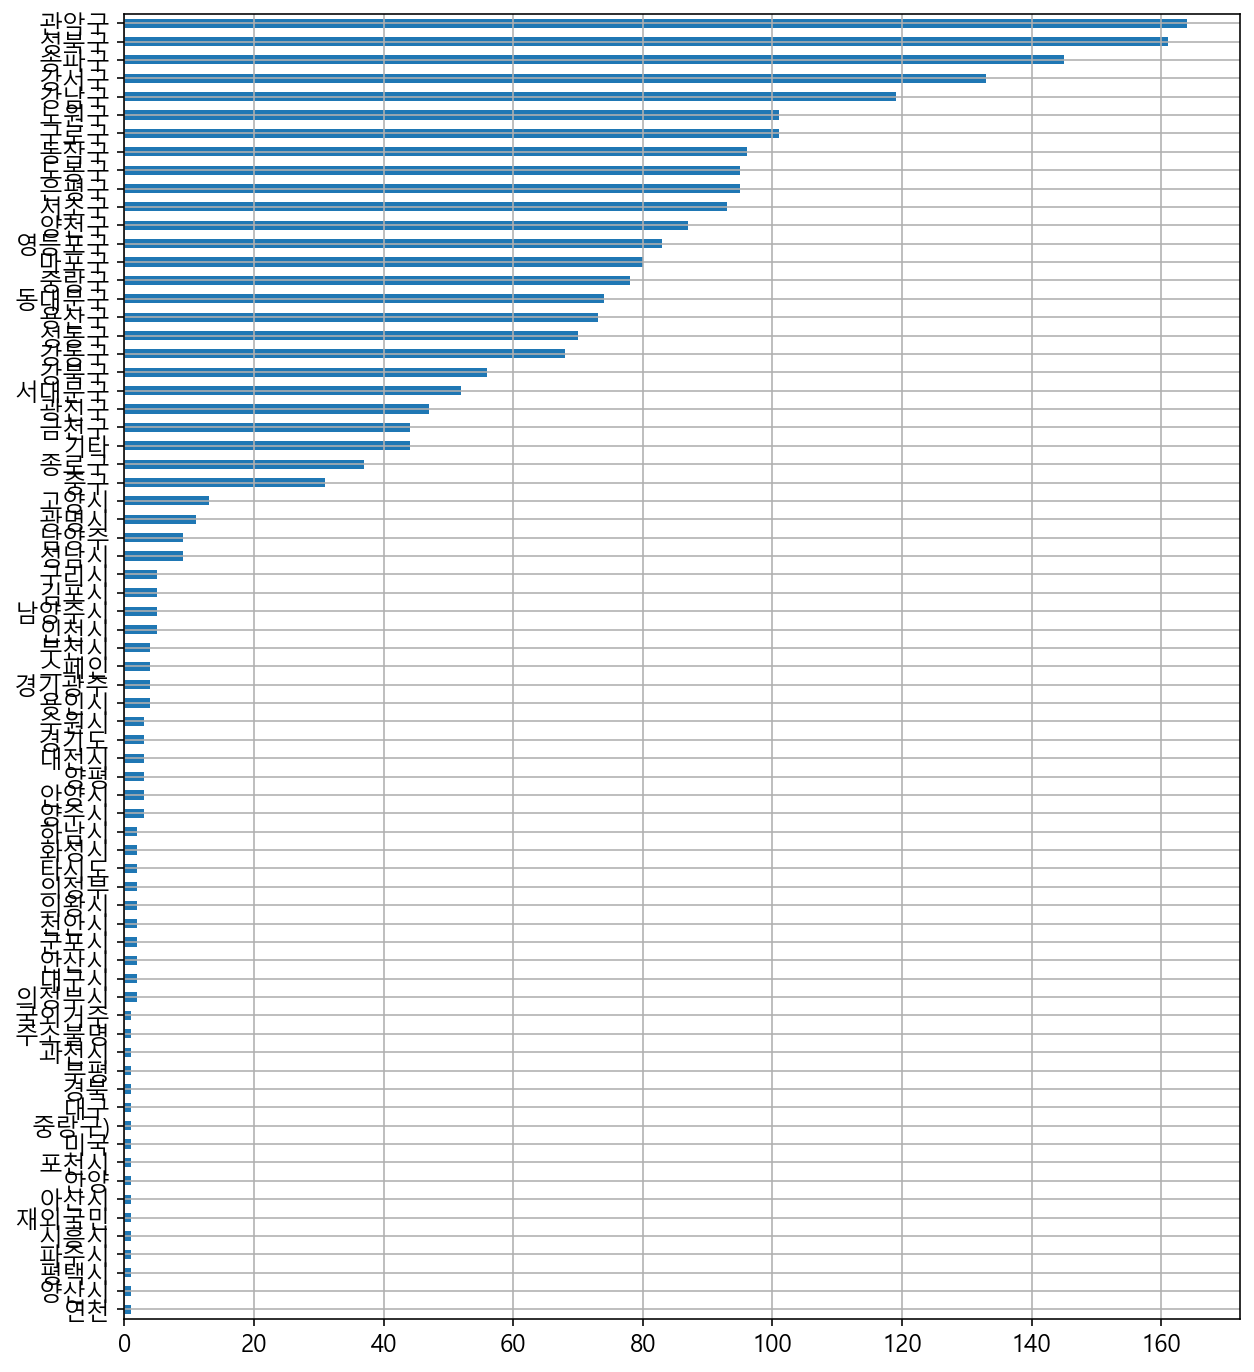

In [171]:
gu_count.sort_values().plot.barh(figsize=(10,12), grid=True)

In [172]:
df_covid["거주지"].unique()

array(['기타', '노원구', '도봉구', '강남구', '서초구', '양천구', '성북구', '종로구', '중구', '강북구',
       '용산구', '은평구', '강서구', '구로구', '관악구', '강동구', '동대문구', '동작구', '영등포구',
       '중랑구', '송파구', '중랑구)', '광진구', '남양주', '금천구', '구리시', '성동구', '서대문구',
       '마포구', '용인시', '경기도', '의정부시', '안양시', '남양주시', '의왕시', '광명시', '타시도',
       '성남시', '안산시', '연천', '부천시', '고양시', '경기광주', '과천시', '하남시', '화성시',
       '포천시', '대구', '대전시', '군포시', '의정부', '양산시', '주소불명', '수원시', '김포시',
       '인천시', '양주시', '안양', '양평', '부평', '미국', '천안시', '시흥시', '스페인', '재외국민',
       '국외거주', '파주시', '대구시', '경북', '평택시', '아산시'], dtype=object)

In [173]:
gu = ['송파구', '강남구', '동대문구', '동작구', '종로구', '광진구', '은평구', '강서구', '성동구',
       '중구', '강동구', '금천구', '성북구', '서대문구', '관악구', '마포구', '도봉구', '용산구',
       '구로구', '강북구', '서초구', '노원구', '중랑구', '영등포구',
      ]
#서울이 아닌 지역 추출
set(gu_count.index) - set(gu)

{'경기광주',
 '경기도',
 '경북',
 '고양시',
 '과천시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '남양주시',
 '대구',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양천구',
 '양평',
 '연천',
 '용인시',
 '의왕시',
 '의정부',
 '의정부시',
 '인천시',
 '재외국민',
 '주소불명',
 '중랑구)',
 '천안시',
 '타시도',
 '파주시',
 '평택시',
 '포천시',
 '하남시',
 '화성시'}

In [178]:
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "환자수"]
df_gu.head(3)

,구,환자수
0,관악구,164
1,성북구,161
2,송파구,145


In [179]:
#isin : 포함되는지 확인
df_covid["거주지"].isin(gu)

연번
2360    False
2359    False
2358    False
2357    False
2356    False
        ...  
5        True
4        True
3        True
2        True
1        True
Name: 거주지, Length: 2360, dtype: bool

In [176]:
sum(df_covid["거주지"].isin(gu))

2096

In [177]:
#타지역 
sum(~df_covid["거주지"].isin(gu))

264

In [180]:
df_covid.loc[df_covid["거주지"].isin(gu), "지역"] = df_covid["거주지"]
df_covid.loc[~df_covid["거주지"].isin(gu), "지역"] = "타지역"

In [181]:
#다른방법
df_covid["지역"] = df_covid["거주지"].map(lambda x : x if x in gu else "타지역")

In [182]:
sum(df_covid["지역"]=="타지역")

264

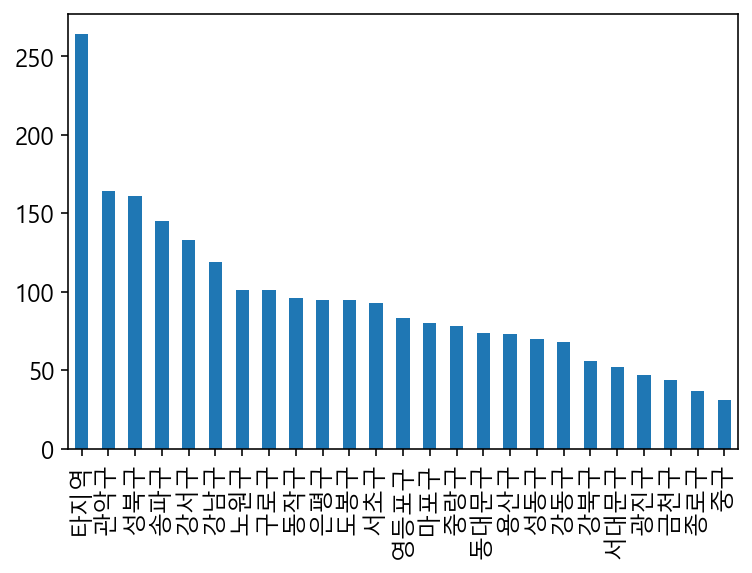

In [183]:
#지역 칼럼으로 확진자 빈도수 구하기
df_gu_etc = df_covid["지역"].value_counts()
df_gu_etc.plot.bar()

In [211]:
df_covid["접촉력"].value_counts().head(20)

성북구 사랑제일교회 관련    373
해외 접촉 추정         354
확인 중             249
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
타시도 확진자 접촉        59
용인시 우리제일교회 관련     51
요양시설 관련           43
양천구 운동시설 관련       43
확인중               42
구로구 교회 관련         41
수도권 개척교회 관련       37
콜센터직원 접촉          37
강남구 사무실 관련        36
왕성교회 관련           30
동대문구 관련           28
부천시 쿠팡 관련         24
해외 접촉             22
송파구 교회관련          19
Name: 접촉력, dtype: int64

In [208]:
def myf(v):
    if v in ("확인 중"):
        return "".join(v.split())
    else:
        return v

In [209]:
df_covid["접촉력"].map(myf)

연번
2360      확인중
2359      확인중
2358      확인중
2357      확인중
2356      확인중
        ...  
5       #5 접촉
4       해외 접촉
3       #3 접촉
2       해외 접촉
1       해외 접촉
Name: 접촉력, Length: 2360, dtype: object

In [204]:
v = "Hello World".split()
"".join(v)

'HelloWorld'

In [212]:
df_covid["접촉력"].unique()

array(['확인 중', '성북구 사랑제일교회 관련', '광화문 집회', '해외 접촉 추정', '타시도 확진자 접촉', '기타',
       '노원구 안디옥교회', '롯데리아 종사자 모임', '용인시 우리제일교회 관련', '양천구 되새김교회',
       '강동구 확진자 접촉', '강북구 확진자 접촉', '마포구 확진자 접촉', '관악구 확진자 접촉',
       '동대문 확진자 접촉', '#14678 접촉', '노원구 확진자 접촉', '동작구 확진자 접촉',
       '중랑구 확진자 접촉', '성동구 확진자 접촉', '용산구 확진자 접촉', '도봉구 확진자 접촉', '관악구 요양병원',
       '광진구 확진자 접촉', '서초구 확진자 접촉', '여의도 순복음 교회', '동대문구 확진자 접촉',
       '구로구 확진자 접촉', '은평구 확진자 접촉', '고양시 반석교회 관련(케네디상가)', '중구 통일상가',
       '양천구 확진자 접촉', '영등포구 확진자 접촉', '강남구 확진자 접촉', '강남구 판매업소',
       '종로구 확진자 접촉', '성북구 확진자 접촉', '#14483 접촉', '성동구 가족관련', '#14488 접촉',
       '도봉구 가족관련', '강남구 커피전문점', '선교회 소모임', '송파구 교회관련', '강서구 확진자 접촉',
       '송파구 확진자 접촉', '종로구 지인모임 신명투자', '강서구 요양시설관련', '강남구 사무실 K빌딩',
       '송파구 지인모임', '중구 확진자 접촉', '관악구 사무실 관련', '강남구 사무실 관련', '강남역삼동 금융회사',
       '확인중', '강서구 요양시설 관련', '강남구 이동통신 종사자', '강남구 역삼동 모임', '왕성교회 관련',
       '중랑구 일가족 관련', '관악구 일가족 관련', '대전 꿈꾸는 교회', '리치웨이 관련', '금천구 확진자 접촉',
       '요양시설 관련', '시청역 관련', '대자연코리아', '의왕

In [217]:
df_covid[df_covid["접촉력"] == "#3 접촉"]
df_covid[df_covid.환자 == "780"]

,환자,확진일,거주지,여행력,접촉력,조치사항,월,주,월일,지역,접촉번호,퇴원,사망,병원
연번,,,,,,,,,,,,,,
31,780,2020-02-22,송파구,-,대구 방문,중앙대학교병원(퇴원),2,8,02-22,송파구,,True,False,중앙대학교병원


In [220]:
import re
#숫자이외의 데이터를 제거하는 정규표현식 
#숫자만 추출
re.sub("[^0-9]", "", "#780 접촉(추정)")

'780'

In [221]:
def get_number(text):
    return re.sub("[^0-9]","", text)

get_number("#780 접촉(추정)")

'780'

In [225]:
df_covid["접촉번호"] = df_covid["접촉력"].map(get_number)
contact = df_covid["접촉번호"].value_counts().reset_index()
contact.columns = ["전파자","감염자수"]
contact

,전파자,감염자수
0,,2264
1,14678,7
2,9734,4
3,6,4
4,8486,3
...,...,...
60,8709,1
61,11196,1
62,9800,1
63,7500,1


In [226]:
#조치사항에 대한 빈도수
df_covid["조치사항"].value_counts()

서울의료원(퇴원)     465
보라매병원(퇴원)     313
서남병원(퇴원)      273
서울의료원         125
서남병원          105
             ... 
서울삼육병원(퇴원)      1
강북삼성병원(사망)      1
타시도 이관(사망)      1
건대병원(퇴원)        1
타시도 병상          1
Name: 조치사항, Length: 99, dtype: int64

In [230]:
df_covid["퇴원"] = df_covid["조치사항"].str.contains("퇴원")
df_covid["사망"] = df_covid["조치사항"].str.contains("사망")
df_covid["병원"] = df_covid["조치사항"].str.replace("\(퇴원\)", "")
df_covid["병원"] = df_covid["병원"].str.replace("\(사망\)", "")

In [231]:
df_covid["조치사항"].str.contains("퇴원").sum()

1588

In [228]:
df_covid["병원"]

연번
2360        배정중
2359        배정중
2358        배정중
2357        배정중
2356        배정중
         ...   
5         서울의료원
4         서울의료원
3       서울대학교병원
2         서울의료원
1       국립중앙의료원
Name: 병원, Length: 2360, dtype: object

In [229]:
df_covid["퇴원"].value_counts()

True     1588
False     771
Name: 퇴원, dtype: int64

In [193]:
#퇴원여부 빈도수에 대한 비율을 구한다. 
df_covid["퇴원"].value_counts(normalize=True)*100

True     67.31666
False    32.68334
Name: 퇴원, dtype: float64

In [194]:
df_covid["사망"].value_counts()

False    2345
True       14
Name: 사망, dtype: int64

In [195]:
df_covid["사망"].value_counts(normalize=True)*100

False    99.406528
True      0.593472
Name: 사망, dtype: float64

In [234]:
df_covid["병원"].unique()

array(['배정중', '서울의료원', '안산생활치료센터', '국립중앙의료원', '서남병원', '생활치료센터(남산)',
       '서울대학교병원', '삼육서울병원', '상계백병원', '보라매병원', '서북병원', '타시도이관', '생활치료센터',
       '안산생활지료센터', '강북삼성병원', '서울백병원', '고대구로병원', '병상 배정 중', '은평성모병원',
       '생활치료센터(남산유스)', '남산유스호스텔', '중앙대학교병원', '타시도 이관', '타시도 병상', '강남세브란스',
       '강남세스브란스', '서울으료원', '신촌세브란스병원', nan, '한양대학교병원', '강남세브란스병원', '사남병원',
       '한일병원', '강남성심병원', '보라매 병원', '원자력병원', '건국대학교병원', '순천향병원', '순천향대병원',
       '삼성서울병원', '서울성모병원', '서울아산병원', '서울삼육병원', '남산생활치료센터', '건국대병원',
       '중앙대병원', '서울대병원', '한양대병원', '서납병원', '순천향서울병원', '서울대학병원', '생활치료시설',
       '세브란스병원', '중앙대학병원', '국군수도병원', '서울삼성병원', '한양대병원/국립중앙의료원',
       '국군수도통합병원', '적십자병원', '건대병원', '경희대학교병원', '순천향대학병원', '고대안암병원'],
      dtype=object)

In [236]:
#확진자중에서 가장 오래 입원해있는 확진자 : 퇴원, 사망, 타지역이 아닌 사람 
df_covid[(df_covid.퇴원==False) &
         (df_covid.사망==False) &
         (df_covid.지역=="타지역")].sort_values(by="확진일", ascending=True).head(3)

,환자,확진일,거주지,여행력,접촉력,조치사항,월,주,월일,지역,접촉번호,퇴원,사망,병원
연번,,,,,,,,,,,,,,
1409,13363,2020-07-10,광명시,-,확인 중,타시도 이관,7,28,07-10,타지역,,False,False,타시도 이관
1608,14382,2020-08-02,성남시,일본,해외 접촉 추정,서울백병원,8,31,08-02,타지역,,False,False,서울백병원
1611,14386,2020-08-02,대구,이라크,해외 접촉 추정,국립중앙의료원,8,31,08-02,타지역,,False,False,국립중앙의료원


In [237]:
df_covid["병원"].describe()

count      2359
unique       62
top       서울의료원
freq        591
Name: 병원, dtype: object

In [238]:
#병원의 빈도수
hospital_count = df_covid["병원"].value_counts()

In [241]:
top10_hospital_count = hospital_count[:10]

In [243]:
df_covid.groupby(["지역","병원"])["환자"].count()

지역   병원      
강남구  강남성심병원       1
     강남세브란스병원     1
     강북삼성병원       1
     고대구로병원       1
     국립중앙의료원      4
                 ..
타지역  은평성모병원       1
     중앙대학교병원      1
     타시도 병상       1
     타시도 이관      71
     타시도이관       16
Name: 환자, Length: 410, dtype: int64

In [240]:
hospital_gu = df_covid.groupby(["지역","병원"])["환자"].count().unstack()
hospital_gu.iloc[:8, :8]

병원,강남성심병원,강남세브란스,강남세브란스병원,강남세스브란스,강북삼성병원,건국대병원,건국대학교병원,건대병원
지역,,,,,,,,
강남구,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
강동구,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강서구,1.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN
관악구,3.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
광진구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
구로구,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
금천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
hospital_gu.loc["강남구"].head()

병원
강남성심병원      1.0
강남세브란스      NaN
강남세브란스병원    1.0
강남세스브란스     NaN
강북삼성병원      1.0
Name: 강남구, dtype: float64

In [248]:
top10_hospital_count.index

Index(['서울의료원', '보라매병원', '서남병원', '서북병원', '생활치료센터', '배정중', '국립중앙의료원', '타시도 이관',
       '생활치료센터(남산유스)', '은평성모병원'],
      dtype='object')

In [246]:
hospital_gu.loc[["강남구","노원구","강북구"],top10_hospital_count.index]

,서울의료원,보라매병원,서남병원,서북병원,생활치료센터,배정중,국립중앙의료원,타시도 이관,생활치료센터(남산유스),은평성모병원
지역,,,,,,,,,,
강남구,34.0,30.0,15.0,4.0,6.0,2.0,4.0,NaN,NaN,NaN
노원구,42.0,7.0,2.0,14.0,5.0,9.0,2.0,NaN,6.0,NaN
강북구,20.0,3.0,6.0,6.0,4.0,3.0,1.0,NaN,5.0,NaN


In [247]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap.style.background_gradient()

In [249]:
#전체병원이  너무 많으므로 환자가 많은 병원만 보기
hospital_gu_heatmap[top10_hospital_count.index].style.background_gradient(cmap="Blues")

병원,서울의료원,보라매병원,서남병원,서북병원,생활치료센터,배정중,국립중앙의료원,타시도 이관,생활치료센터(남산유스),은평성모병원
지역,,,,,,,,,,
강남구,34,30,15,4,6,2,4,0,0,0
강동구,34,8,7,2,0,2,4,0,2,0
강북구,20,3,6,6,4,3,1,0,5,0
강서구,17,25,39,13,7,1,5,0,0,5
관악구,24,64,35,6,10,1,3,0,1,1
광진구,23,5,8,2,0,1,1,0,2,0
구로구,16,29,25,3,2,4,12,0,0,2
금천구,3,16,17,1,1,0,1,0,1,2
노원구,42,7,2,14,5,9,2,0,6,0


In [ ]:
#여행력

df_covid["해외"] = df_covid["여행력"]
df_covid["해외"] = df_covid["해외"].str.strip()
df_covid["해외"] = df_covid["해외"].str.replace("-", np.nan)
df_covid["해외"] = df_covid["해외"].str.replace("", np.nan)
df_covid["해외"].unique()

In [252]:
df_covid["해외"].describe()
# count     빈도수 
# unique     병원수 
# top        가장 많은 빈도로 등장하는 텍스트 
# freq      가장 많은 빈도의 횟수 

count     2360
unique      70
top          -
freq      1983
Name: 해외, dtype: object

In [253]:
df_covid["해외"].value_counts()

-                   1983
미국                   137
영국                    47
필리핀                   22
스페인                   12
                    ... 
모로코, 터키                1
페루, 미국                 1
사우디아라비아                1
아르헨티나, 볼리비아, 브라질       1
독일,프랑스                 1
Name: 해외, Length: 70, dtype: int64

In [254]:
#여행력이 있는 데이터만 가져와서 서브셋만들기
df_oversea = df_covid[df_covid["해외"].notnull()].copy()
df_oversea.shape

(2360, 15)

In [276]:
df_oversea["해외"].unique()

array(['-', '카자흐스탄', '유럽', '인도네시아', '중국', '케냐', '인도', '일본', '방글라데시', '미국',
       '필리핀', '에콰도르', '사우디아라비아', '남미', '홍콩', '우즈베키스탄', '러시아', '이라크',
       '키르기스스탄', '쿠웨이트', '나이지리아', 'UAE', '파키스탄', '캐나다', '팔라우',
       '호주, 인도네시아', '포르투칼', '태국', '말레이시아', '베트남', '싱가포르'], dtype=object)

In [256]:
#텍스트 데이터 다루기
europe = "체코, 헝가리, 오스트리아, 이탈리아, 모로코, 독일, 프랑스, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(', ',"|")
europe

'체코|헝가리|오스트리아|이탈리아|모로코|독일|프랑스|스페인|영국|폴란드|터키|아일랜드'

In [257]:
south_america = "브라질, 아르헨티나, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티나|칠레|볼리비아|멕시코|페루'

In [258]:
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].unique()

array(['-', '카자흐스탄', '유럽', '인도네시아', '중국', '케냐', '인도', '일본', '방글라데시', '미국',
       '필리핀', '에콰도르', '사우디아라비아', '남미', '홍콩', '우즈베키스탄', '러시아', '이라크',
       '키르기스스탄', '쿠웨이트', '나이지리아', 'UAE', '파키스탄', '캐나다', '팔라우',
       '호주, 인도네시아', '포르투칼', '태국', '말레이시아', '베트남', '싱가포르'], dtype=object)

In [259]:
df_oversea["해외"].describe()

count     2360
unique      31
top          -
freq      1983
Name: 해외, dtype: object

In [279]:
#전체확진자수오 해외유입 확진자수 비교 
all_count_gu = df_covid["지역"].value_counts()
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진자수"]
df_all_gu

,전체확진자수
타지역,264
관악구,164
성북구,161
송파구,145
강서구,133
강남구,119
노원구,101
구로구,101
동작구,96
은평구,95


In [261]:
a = df_oversea[["해외","거주지"]]
df_oversea_gu = a.groupby("거주지").count()
df_oversea_gu.columns = ["해외유입확진자수"]
df_oversea_gu.head(3)

,해외유입확진자수
거주지,
강남구,119
강동구,68
강북구,56


In [262]:
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head(3)

,전체확진자수,해외유입확진자수
관악구,164,164
성북구,161,161
송파구,145,145


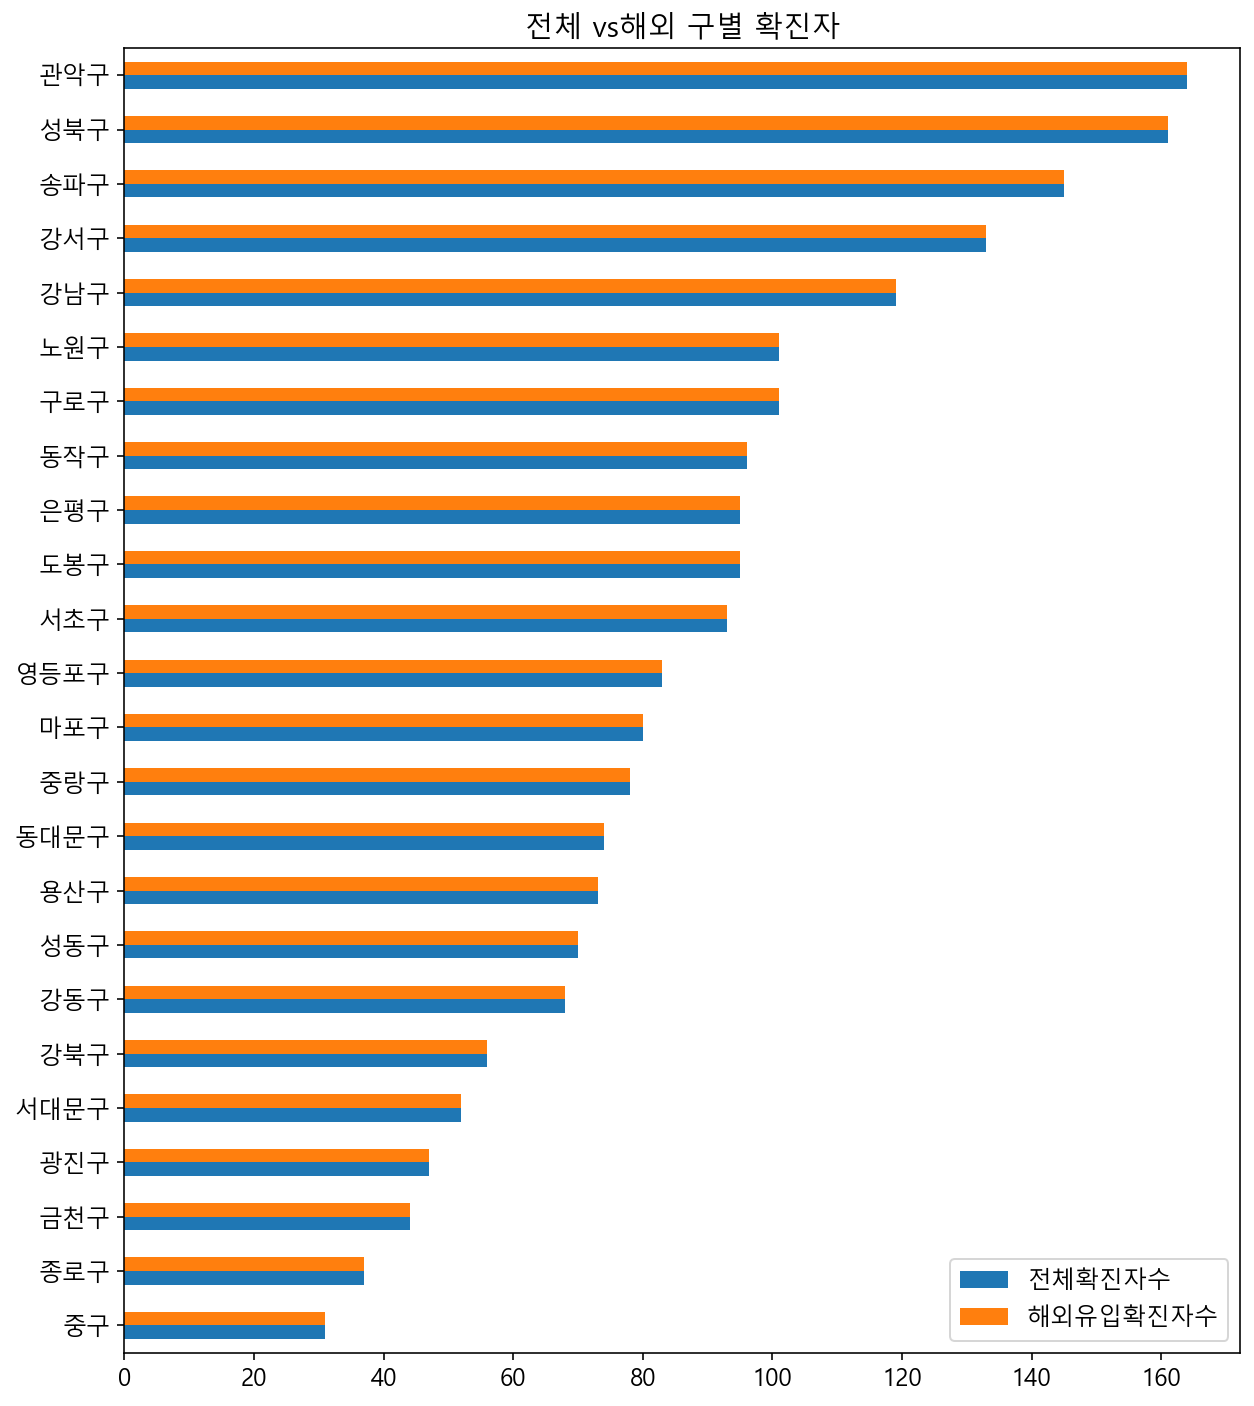

In [280]:
df_all_oversea_case.sort_values(by="해외유입확진자수").plot.barh(
    title="전체 vs해외 구별 확진자",
    figsize=(10,12))

In [281]:
df_oversea.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '조치사항', '월', '주', '월일', '지역', '접촉번호',
       '퇴원', '사망', '병원', '해외'],
      dtype='object')

In [282]:
#구와 월별 해외 확진자수 
month_gu = df_oversea.groupby(["월","거주지"])["환자"].count().unstack()
month_gu.fillna(0).astype(int).style.background_gradient()

거주지,강남구,강동구,강북구,강서구,경기광주,경기도,경북,고양시,과천시,관악구,광명시,광진구,구로구,구리시,국외거주,군포시,금천구,기타,김포시,남양주,남양주시,노원구,대구,대구시,대전시,도봉구,동대문구,동작구,마포구,미국,부천시,부평,서대문구,서초구,성남시,성동구,성북구,송파구,수원시,스페인,시흥시,아산시,안산시,안양,안양시,양산시,양주시,양천구,양평,연천,영등포구,용산구,용인시,은평구,의왕시,의정부,의정부시,인천시,재외국민,종로구,주소불명,중구,중랑구,중랑구),천안시,타시도,파주시,평택시,포천시,하남시,화성시
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0
2,7,4,0,1,0,0,1,2,0,4,0,1,1,0,0,0,1,0,1,0,0,8,0,1,0,0,1,1,0,0,0,0,4,4,0,3,1,12,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,7,0,0,0,2,0,8,0,0,0,0,0,0,0,1,0,0,0
3,34,6,5,20,0,0,0,2,0,30,5,5,33,0,1,0,11,0,0,0,0,12,0,1,1,6,25,23,16,0,1,0,9,21,4,3,13,15,1,0,0,0,0,0,0,0,1,17,0,0,18,12,1,14,0,0,0,1,1,4,0,5,12,0,1,0,1,0,0,0,0
4,23,3,0,4,0,0,0,2,0,9,0,2,1,0,0,0,0,0,0,1,0,3,0,0,0,3,5,7,7,1,0,0,6,13,0,13,9,10,0,4,1,0,0,0,0,0,0,3,0,0,5,6,1,7,0,0,0,0,0,1,0,1,3,0,1,0,0,0,0,0,1
5,11,11,9,19,0,0,0,0,0,16,0,6,6,2,0,0,3,0,1,1,0,8,0,0,0,10,3,9,3,0,0,1,8,4,0,21,5,11,0,0,0,0,0,1,1,0,1,6,3,0,11,20,0,7,1,0,0,0,0,3,0,3,3,0,0,0,0,0,0,0,0
6,8,11,10,33,0,0,0,1,0,58,3,3,45,0,0,1,17,1,3,3,0,12,0,0,1,43,4,13,12,0,2,0,8,15,1,9,4,7,2,0,0,0,1,0,0,1,1,43,0,0,29,12,0,18,0,2,0,2,0,3,1,3,14,0,0,0,0,0,0,0,0
7,15,14,4,25,1,0,0,3,0,27,1,5,5,0,0,1,7,2,0,1,0,6,0,0,1,2,6,17,14,0,0,0,6,7,1,8,9,44,0,0,0,0,0,0,0,0,0,1,0,0,7,4,1,11,0,0,0,0,0,6,0,8,11,0,0,0,0,0,0,0,0
8,21,19,28,30,3,3,0,3,1,20,2,25,10,3,0,0,5,41,0,3,5,52,1,0,0,31,30,26,27,0,1,0,11,29,3,13,119,46,0,0,0,0,1,0,2,0,0,16,0,1,11,19,1,31,1,0,2,0,0,9,0,11,34,1,0,2,0,0,1,2,1


In [283]:
#crosstab 의 이용 
month_gu = pd.crosstab(index=df_oversea["월"], 
                       columns=df_oversea["거주지"])
month_gu.style.background_gradient()

거주지,강남구,강동구,강북구,강서구,경기광주,경기도,경북,고양시,과천시,관악구,광명시,광진구,구로구,구리시,국외거주,군포시,금천구,기타,김포시,남양주,남양주시,노원구,대구,대구시,대전시,도봉구,동대문구,동작구,마포구,미국,부천시,부평,서대문구,서초구,성남시,성동구,성북구,송파구,수원시,스페인,시흥시,아산시,안산시,안양,안양시,양산시,양주시,양천구,양평,연천,영등포구,용산구,용인시,은평구,의왕시,의정부,의정부시,인천시,재외국민,종로구,주소불명,중구,중랑구,중랑구),천안시,타시도,파주시,평택시,포천시,하남시,화성시
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0
2,7,4,0,1,0,0,1,2,0,4,0,1,1,0,0,0,1,0,1,0,0,8,0,1,0,0,1,1,0,0,0,0,4,4,0,3,1,12,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,7,0,0,0,2,0,8,0,0,0,0,0,0,0,1,0,0,0
3,34,6,5,20,0,0,0,2,0,30,5,5,33,0,1,0,11,0,0,0,0,12,0,1,1,6,25,23,16,0,1,0,9,21,4,3,13,15,1,0,0,0,0,0,0,0,1,17,0,0,18,12,1,14,0,0,0,1,1,4,0,5,12,0,1,0,1,0,0,0,0
4,23,3,0,4,0,0,0,2,0,9,0,2,1,0,0,0,0,0,0,1,0,3,0,0,0,3,5,7,7,1,0,0,6,13,0,13,9,10,0,4,1,0,0,0,0,0,0,3,0,0,5,6,1,7,0,0,0,0,0,1,0,1,3,0,1,0,0,0,0,0,1
5,11,11,9,19,0,0,0,0,0,16,0,6,6,2,0,0,3,0,1,1,0,8,0,0,0,10,3,9,3,0,0,1,8,4,0,21,5,11,0,0,0,0,0,1,1,0,1,6,3,0,11,20,0,7,1,0,0,0,0,3,0,3,3,0,0,0,0,0,0,0,0
6,8,11,10,33,0,0,0,1,0,58,3,3,45,0,0,1,17,1,3,3,0,12,0,0,1,43,4,13,12,0,2,0,8,15,1,9,4,7,2,0,0,0,1,0,0,1,1,43,0,0,29,12,0,18,0,2,0,2,0,3,1,3,14,0,0,0,0,0,0,0,0
7,15,14,4,25,1,0,0,3,0,27,1,5,5,0,0,1,7,2,0,1,0,6,0,0,1,2,6,17,14,0,0,0,6,7,1,8,9,44,0,0,0,0,0,0,0,0,0,1,0,0,7,4,1,11,0,0,0,0,0,6,0,8,11,0,0,0,0,0,0,0,0
8,21,19,28,30,3,3,0,3,1,20,2,25,10,3,0,0,5,41,0,3,5,52,1,0,0,31,30,26,27,0,1,0,11,29,3,13,119,46,0,0,0,0,1,0,2,0,0,16,0,1,11,19,1,31,1,0,2,0,0,9,0,11,34,1,0,2,0,0,1,2,1


In [267]:
#pivot table로 빈도수 구하기

month_gu = pd.pivot_table(df_oversea,
              index="월",
              columns="거주지",
              values="환자",
              aggfunc = "count",
              fill_value=0)
month_gu.style.background_gradient()

거주지,강남구,강동구,강북구,강서구,경기광주,경기도,경북,고양시,과천시,관악구,광명시,광진구,구로구,구리시,국외거주,군포시,금천구,기타,김포시,남양주,남양주시,노원구,대구,대구시,대전시,도봉구,동대문구,동작구,마포구,미국,부천시,부평,서대문구,서초구,성남시,성동구,성북구,송파구,수원시,스페인,시흥시,아산시,안산시,안양,안양시,양산시,양주시,양천구,양평,연천,영등포구,용산구,용인시,은평구,의왕시,의정부,의정부시,인천시,재외국민,종로구,주소불명,중구,중랑구,중랑구),천안시,타시도,파주시,평택시,포천시,하남시,화성시
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0
2,7,4,0,1,0,0,1,2,0,4,0,1,1,0,0,0,1,0,1,0,0,8,0,1,0,0,1,1,0,0,0,0,4,4,0,3,1,12,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,7,0,0,0,2,0,8,0,0,0,0,0,0,0,1,0,0,0
3,34,6,5,20,0,0,0,2,0,30,5,5,33,0,1,0,11,0,0,0,0,12,0,1,1,6,25,23,16,0,1,0,9,21,4,3,13,15,1,0,0,0,0,0,0,0,1,17,0,0,18,12,1,14,0,0,0,1,1,4,0,5,12,0,1,0,1,0,0,0,0
4,23,3,0,4,0,0,0,2,0,9,0,2,1,0,0,0,0,0,0,1,0,3,0,0,0,3,5,7,7,1,0,0,6,13,0,13,9,10,0,4,1,0,0,0,0,0,0,3,0,0,5,6,1,7,0,0,0,0,0,1,0,1,3,0,1,0,0,0,0,0,1
5,11,11,9,19,0,0,0,0,0,16,0,6,6,2,0,0,3,0,1,1,0,8,0,0,0,10,3,9,3,0,0,1,8,4,0,21,5,11,0,0,0,0,0,1,1,0,1,6,3,0,11,20,0,7,1,0,0,0,0,3,0,3,3,0,0,0,0,0,0,0,0
6,8,11,10,33,0,0,0,1,0,58,3,3,45,0,0,1,17,1,3,3,0,12,0,0,1,43,4,13,12,0,2,0,8,15,1,9,4,7,2,0,0,0,1,0,0,1,1,43,0,0,29,12,0,18,0,2,0,2,0,3,1,3,14,0,0,0,0,0,0,0,0
7,15,14,4,25,1,0,0,3,0,27,1,5,5,0,0,1,7,2,0,1,0,6,0,0,1,2,6,17,14,0,0,0,6,7,1,8,9,44,0,0,0,0,0,0,0,0,0,1,0,0,7,4,1,11,0,0,0,0,0,6,0,8,11,0,0,0,0,0,0,0,0
8,21,19,28,30,3,3,0,3,1,20,2,25,10,3,0,0,5,41,0,3,5,52,1,0,0,31,30,26,27,0,1,0,11,29,3,13,119,46,0,0,0,0,1,0,2,0,0,16,0,1,11,19,1,31,1,0,2,0,0,9,0,11,34,1,0,2,0,0,1,2,1


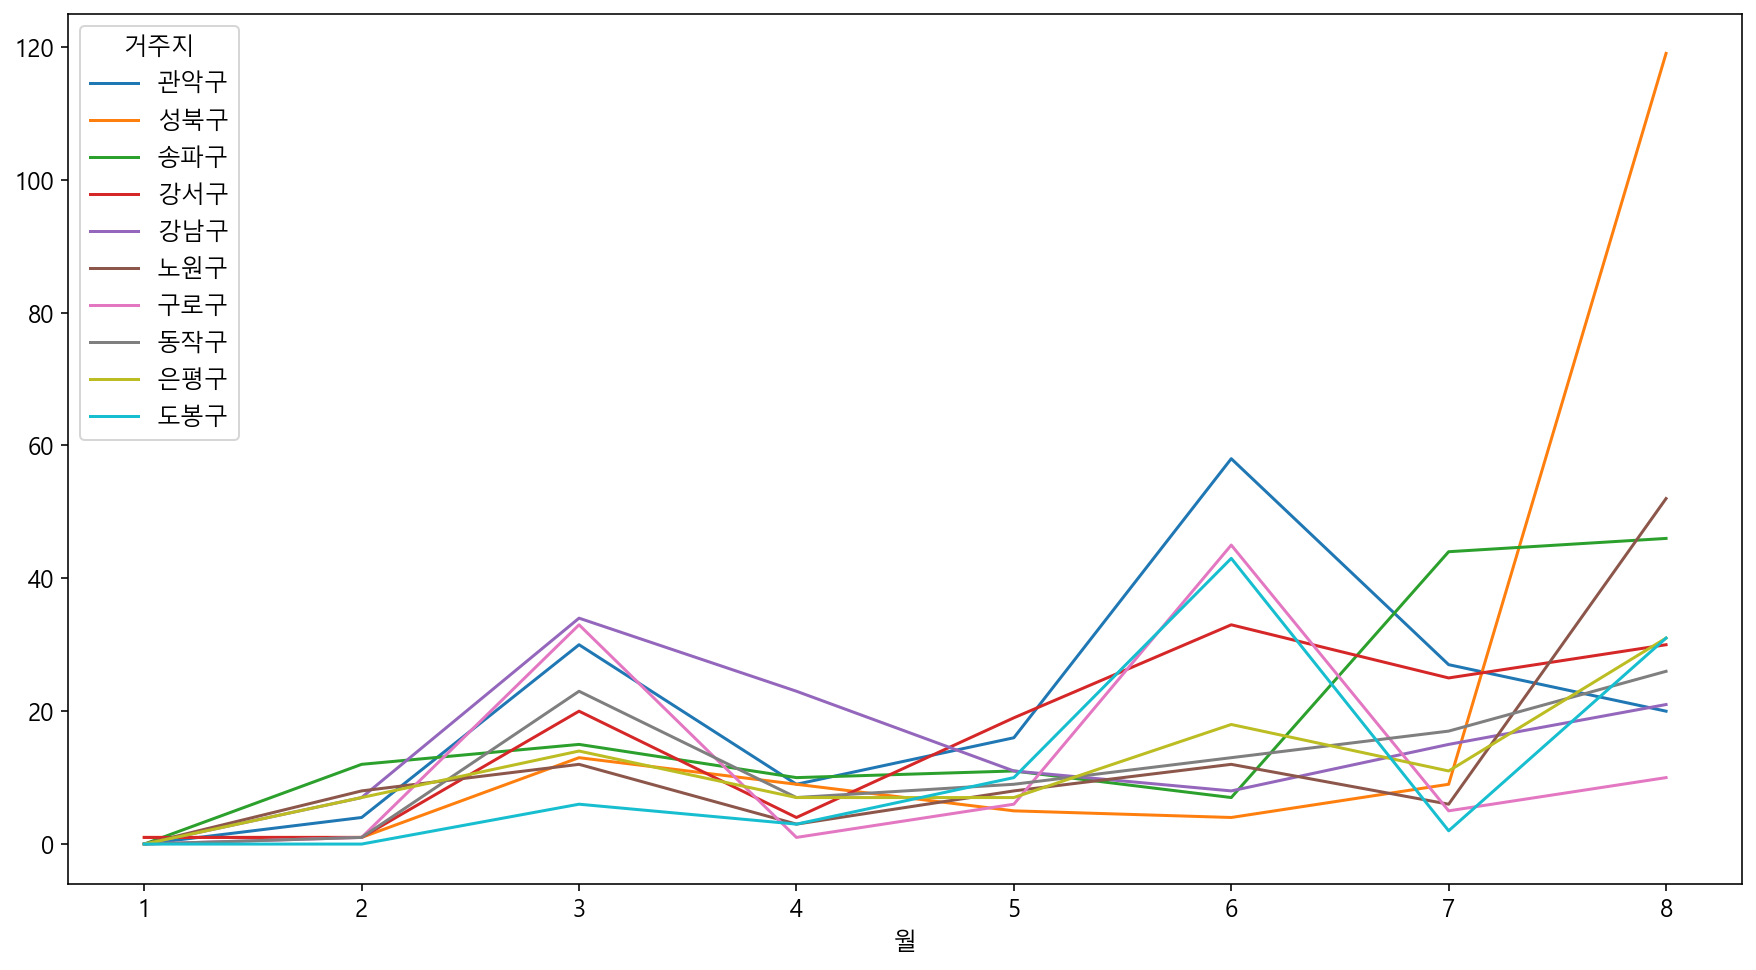

In [268]:
#해외유입이 많은 지역 상위10

top_oversea_gu = df_oversea_gu.sort_values(
    by="해외유입확진자수", ascending=False).head(10)
top_oversea_gu.index

month_gu[top_oversea_gu.index].plot(figsize=(15,8))

In [269]:
#구별 해외유입 국가 분석하기
group_oversea_gu = df_oversea.groupby(["해외","거주지"])["환자"].count().unstack()
group_oversea_gu.fillna(0)

거주지,강남구,강동구,강북구,강서구,경기광주,경기도,경북,고양시,과천시,관악구,...,중구,중랑구,중랑구),천안시,타시도,파주시,평택시,포천시,하남시,화성시
해외,,,,,,,,,,,,,,,,,,,,,
-,78.0,52.0,54.0,122.0,4.0,3.0,1.0,11.0,1.0,150.0,...,24.0,69.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,1.0
UAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
나이지리아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
남미,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
러시아,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
말레이시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
미국,22.0,5.0,1.0,4.0,0.0,0.0,0.0,2.0,0.0,4.0,...,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
방글라데시,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
베트남,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
#pivot table 구하기
group_oversea_gu = \
  pd.pivot_table(
    data=df_oversea,
    index = "해외",
    columns="거주지",
    values="환자",
    aggfunc="count", fill_value=0
)


In [271]:
group_oversea_gu

거주지,강남구,강동구,강북구,강서구,경기광주,경기도,경북,고양시,과천시,관악구,...,중구,중랑구,중랑구),천안시,타시도,파주시,평택시,포천시,하남시,화성시
해외,,,,,,,,,,,,,,,,,,,,,
-,78,52,54,122,4,3,1,11,1,150,...,24,69,1,0,2,0,1,1,2,1
UAE,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
남미,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
러시아,1,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미국,22,5,1,4,0,0,0,2,0,4,...,0,4,0,2,0,0,0,0,0,1
방글라데시,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
#일부구간 따로보기
gu3 = group_oversea_gu[["강남구","서초구","송파구","노원구"]]
gu3

거주지,강남구,서초구,송파구,노원구
해외,,,,
-,78,63,120,89
UAE,0,0,1,1
나이지리아,0,0,0,0
남미,2,1,1,1
러시아,1,0,0,0
말레이시아,0,0,0,0
미국,22,18,11,2
방글라데시,1,0,0,0
베트남,0,0,0,0


In [273]:
#top_oversea_gu에 따른 확진자수 보기 
group_oversea_gu[top_oversea_gu.index]

거주지,관악구,성북구,송파구,강서구,강남구,노원구,구로구,동작구,은평구,도봉구
해외,,,,,,,,,,
-,150,146,120,122,78,89,98,82,86,85
UAE,0,0,1,0,0,1,0,0,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0
남미,0,0,1,0,2,1,0,0,2,0
러시아,0,0,0,0,1,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0
미국,4,9,11,4,22,2,1,3,1,3
방글라데시,0,0,0,0,1,0,0,1,0,0
베트남,0,0,0,1,0,0,0,0,0,0
